# Project overview

## FINACIAL INCLUSIVITY CHECKER

This is the notebook that will house the dataset to be prepared and later analysed in accordance to the project goals.

###DATASET
The group Brainy Badgers, has been tasked with assessing the level of financial inclusion in the region encompassing Kenya, Rwanda , Uganda and Tanzania. This is being done with the help of a dataset called the Financial Inclusion dataset.It is an excel format datatable that has thirteen columns and twenty three thousand five hundred and twenty five rows.The attributes are as follows:

-country -(Country interviewee is in.)

-year -(Year survey was done in.)

-unique id - (Unique identifier for each interviewee)

-location type -(Type of location: Rural, Urban)

-cellphone access -(If interviewee has access to a cellphone: Yes, No)

-household size -(Number of people living in one house)

-Age of respondent -(The age of the interviewee)

-gender of respondent - (Gender of interviewee: Male, Female)

-relationship with head - (The interviewees' relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know)

-maritial status - (The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know)

-education level - (Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA)

-job type - (Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer)

Prior to the analysis of the dataset, cleaning will be undertaken. Primarily this will involve the removal of duplicates ,removal of the uniqueid column and the changing of the datatypes respectively.

The next step will be the creation of new columns from the breaking of existing columns. From the relationship with head column,we will create a new column called head_of_household,this will state yes if the respondent is the head of the household.

The next column to be broken will be the maritial status column creating a new column called the living_condition which will identify the state of the respondent whether they live with their spouse or not.

To then ensure the validity of the data we will then identify duplications in the dataset ,removing all duplicates from the data.

After this, the data will be cleaned to sufficently.



# 1.0 Import the libraries

In [ ]:
#First we will import all important libraries : Panda and Numpy.
#
import pandas as pd
import numpy as np

# 2.0 Upload the the datasets.

In [ ]:
# Upload the Dataset
df = pd.read_csv('/content/Train.csv')

In [ ]:
# Upload the Dataset definitions
Variable_df = pd.read_csv('/content/VariableDefinitions.csv')

FileNotFoundError: ignored

# 3.0 Preview the data

In [ ]:
# Preview the Train.csv Dataset.
df.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Preview the Variable Definitions csv.
# pd.read_('/content/VariableDefinitions.csv')
Variable_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# 4.0 Accessing Information about our Dataset

In [ ]:
# Getting to know more about the dataset by accessing its information

print(df.columns)
print(df.shape)
print(df.isnull().sum())

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')
(23524, 13)
country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


# 5.0 Data Cleaning





## Checking if column names match with variable definitions csv

In [ ]:
Variable_df['Variable Definitions']

NameError: ignored

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

## 5.01 Splitting columns

In [ ]:

# Splitting the column 'marital_status' into
# marital status and living conditions.
df[['marital_status','living_condition']] = df['marital_status'].str.split('/',expand=True)


In [ ]:
#Checking changes
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,living_condition
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Living together
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,None
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Never Married
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Living together
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Never Married


## 5.02 Create a Head of household column

In [ ]:
#Create a new column 'Head of household'  
#Make'Head of household' with True='Yes' and False='No'
df['head_of_household'] = df.loc[:, 'relationship_with_head']
df['head_of_household'].replace('Head of Household','Yes', inplace=True)
df['head_of_household'].replace(to_replace=('Spouse','Other relative','Child','Parent' ,'Other non-relatives', 'Dont Know' ,'Spouse' ) , value='No' , inplace =True)
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,living_condition,head_of_household
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Living together,No
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,None,Yes
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Never Married,No
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Living together,Yes
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Never Married,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income,Seperated,Yes
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income,Never Married,Yes
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,None,No
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed,Seperated,No


## 5.03 Check for duplicates

In [ ]:
#checking for duplicates
df.duplicated().sum()

0

## 5.04 Check for null values

In [ ]:
#Checking for null values
df.isnull().sum()

country                      0
year                         0
uniqueid                     0
bank_account                 0
location_type                0
cellphone_access             0
household_size               0
age_of_respondent            0
gender_of_respondent         0
relationship_with_head       0
marital_status               0
education_level              0
job_type                     0
living_condition          2716
head_of_household            0
dtype: int64

## 5.06 Replace null values


In [ ]:
# To replace null values in living status with the corre

df.living_condition.fillna(df.marital_status,inplace=True) 


In [ ]:
# To check if null values are replaced
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
living_condition          0
head_of_household         0
dtype: int64

## 5.07 Drop the Unique id. 

In [ ]:
#Dropping the Unique id column 
df.drop('uniqueid', axis=1,inplace=True)
df.head(10)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,living_condition,head_of_household
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Living together,No
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Widowed,Yes
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Never Married,No
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Living together,Yes
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Never Married,No
5,Kenya,2018,No,Rural,No,7,26,Female,Spouse,Married,Primary education,Informally employed,Living together,No
6,Kenya,2018,No,Rural,Yes,7,32,Female,Spouse,Married,Primary education,Self employed,Living together,No
7,Kenya,2018,No,Rural,Yes,1,42,Female,Head of Household,Married,Tertiary education,Formally employed Government,Living together,Yes
8,Kenya,2018,Yes,Rural,Yes,3,54,Male,Head of Household,Married,Secondary education,Farming and Fishing,Living together,Yes
9,Kenya,2018,No,Urban,Yes,3,76,Female,Head of Household,Divorced,No formal education,Remittance Dependent,Seperated,Yes


## 5.08 Checking and aligning column datatypes

In [ ]:
#Checking column datatypes
df.dtypes

country                   object
year                       int64
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
living_condition          object
head_of_household         object
dtype: object

In [ ]:
#Converting the Yes/No value columns into boolean datatypes
#
convert_dict = {'bank_account': str,'cellphone_access': str ,'head_of_household': str}
df = df.astype(convert_dict)
df.dtypes

country                   object
year                       int64
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
living_condition          object
head_of_household         object
dtype: object

In [ ]:
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,living_condition,head_of_household
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Living together,No
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Widowed,Yes
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Never Married,No
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Living together,Yes
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Never Married,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income,Seperated,Yes
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income,Never Married,Yes
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,Widowed,No
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed,Seperated,No


In [ ]:
#Exporting the cleaned dataset.
#
df.to_csv('Financial_Inclusivity.csv')


###ANALYSIS

After these processes the data will be clean to a satisfactory degree and will now be ready for analysis which will be done both in the pandas method and the sql method.

This will be done using both pandas as well as visualization tools available in the python libraries.This will mean both statistical values and visualizations of target variables will be displayed.A particular visualization tool will be the seaborn visualization.

This analysis is in the form of answering the objectives:

-To determine the number of people who have access to mobile phones and don't have access to the banks

-To determine the percentage of level of access to mobile phones for people in the region.

-To determine the percentage of level of access to mobile phones for people in urban areas and rural areas

-To determine the percentage of level of access to mobile phones for people in the region per country .

-To determine the number of people with access to bank accounts and how this varies in urban and rural areas, variance between the formally employed and the self employed.

-To determine the country with the most mobile phones and the highest number of bank accounts.

-To determine the influence of mobile phone access to and location to job type. 
- To determine the people to be targeted with mobile banking integration.
-To determine the job type to be targeted with fintech marketing in the region for people with a phone but no bank account

-To determine which age has the most access to mobile phones Age with mobile phone but no bank account, highestAge with mobile phone and bank account.


Finally, having answered the objective questions,we will then conclude with an evaluation of the research which was based on the statement:

How mobile money transactions can lead to greater financial inclusion for people who don't have access to banks.Greater financial inclusion leads to greater access to credit services, easier tax base to achieve revenues, better access to savings and fintech services. 


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/Financial_Inclusivity.csv')

In [ ]:
df.dtypes


Unnamed: 0                 int64
country                   object
year                       int64
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
living_condition          object
head_of_household         object
dtype: object

In [ ]:
#The first reaserch objective is as follows:
#To determine the number of people who have access to mobile phones and don't have access to the banks
#
A=df.loc[(df['cellphone_access']=='Yes')& (df['bank_account']=='No')]
A.value_counts('country')


country
Rwanda      6265
Tanzania    3362
Kenya       3326
Uganda      1293
dtype: int64

In [ ]:
#The second research question is as follows:
#To determine the percentage of level of access to mobile phones for people in the region per country.
#
B=df.loc[(df['cellphone_access']=='Yes')] 
B.value_counts('country', normalize=True)



country
Rwanda      0.415320
Kenya       0.274149
Tanzania    0.226653
Uganda      0.083878
dtype: float64

In [ ]:
#The third research question is as follows:
#To determine the percentage of level of access to mobile phones for people in urban areas and rural areas
#
RU=df.loc[(df['cellphone_access']=='Yes')] 
RU.value_counts('location_type', normalize=True)

location_type
Rural    0.634239
Urban    0.365761
dtype: float64

In [ ]:
#The fourth research question is as follows:
#To determine access to mobile phones for people in the region per country .
#
D=df.loc[(df['cellphone_access']=='Yes')] 
D.value_counts('country')


country
Rwanda      7249
Kenya       4785
Tanzania    3956
Uganda      1464
dtype: int64

In [ ]:
#The fifth research question is as follows:
#To determine which age has the most access to mobile phones.
#
age=df.loc[(df['cellphone_access']=='Yes')]
ag=age.value_counts('age_of_respondent')
ag.head(1)

age_of_respondent
30    824
dtype: int64

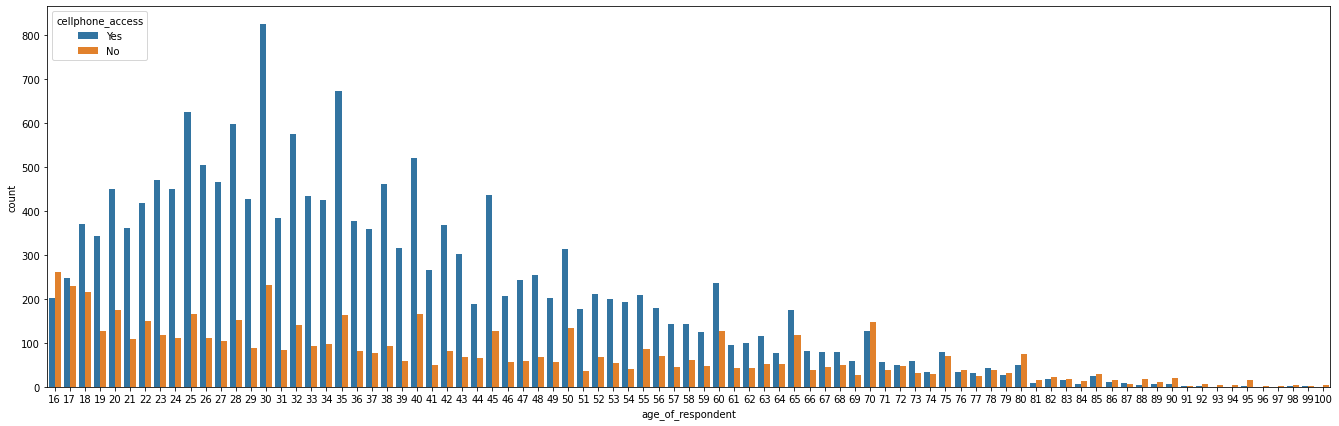

In [ ]:
#The fifth question visualized will present the distribution of the results.
#And assist in the identification of correlations between mobile access and ages of the respondents.
#
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(23,7))
sns.countplot(x='age_of_respondent', data=df ,hue='cellphone_access' )


In [ ]:
#The sixth research question is as follows:
#-To determine the country with the most mobile phones.
#
phone=df.loc[(df['cellphone_access']=='Yes')]
c=phone.value_counts('country')
c.head(1)



country
Rwanda    7249
dtype: int64

In [ ]:
#The seventh research question is as follows:
#Determining the country with the most bank accounts.
#
bank=df.loc[(df['bank_account']=='Yes')]
b=bank.value_counts('country')
b.head(1)

country
Kenya    1521
dtype: int64

In [ ]:
#We will now carry out visualizaion for the dataset above.
#We will use the seaborn library for the visualization.
#
import seaborn as sns
from matplotlib import pyplot as plt


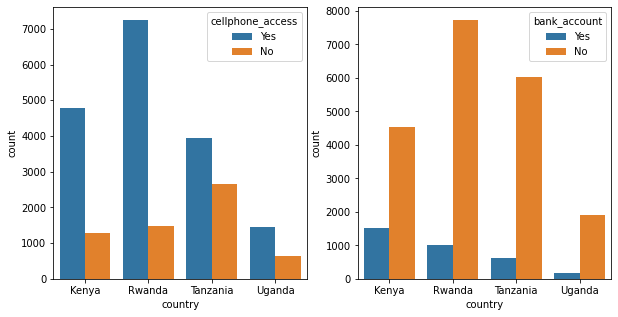

In [ ]:
#The first visualization will regard.
#Determination of trends between the number of people who have access to mobile phones and don't have access to the banks per country
#
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='country', data=df ,hue='cellphone_access' )
plt.subplot(1,2,2)
sns.countplot(x='country', data=df ,hue='bank_account' )

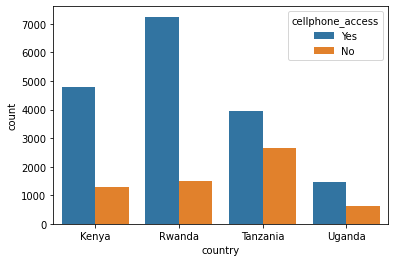

In [ ]:
#The second visualization will regard.
#Determination of the number of people who have access to mobile phones per country .
#
sns.countplot(x='country', data=df ,hue='cellphone_access' )

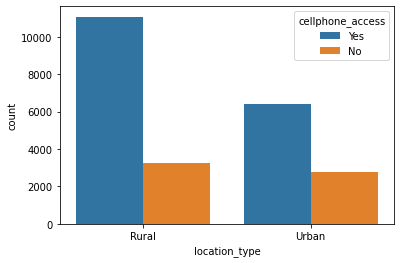

In [ ]:
#The third visualization will regard.
#Determination of the level of access to mobile phones for people in urban areas and rural areas.
#
sns.countplot(x='location_type', data=df ,hue='cellphone_access' )

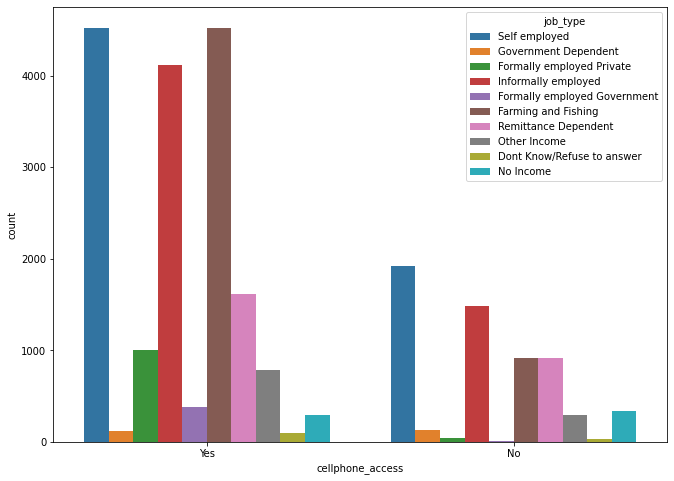

In [ ]:
#The fourth visualization will regard.
#Determination of the influence of mobile phone access to employment status..
#
plt.figure(figsize=(11,8))
sns.countplot(x='cellphone_access', data=df ,hue='job_type' )

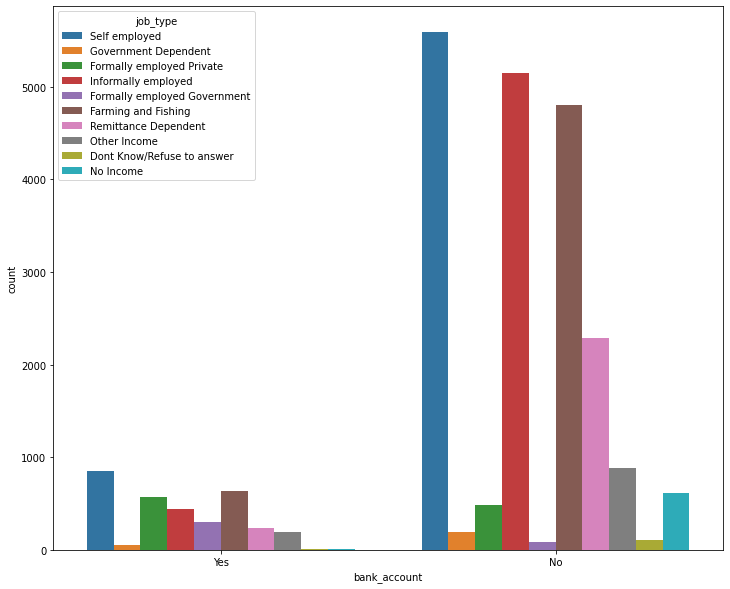

In [ ]:
#The fifth visualization will regard:
#Identification of the employment type and bank account access, this will determine the areas of interest for analysis. 
#
plt.figure(figsize=(12,10))
sns.countplot(x='bank_account', data=df ,hue='job_type' )

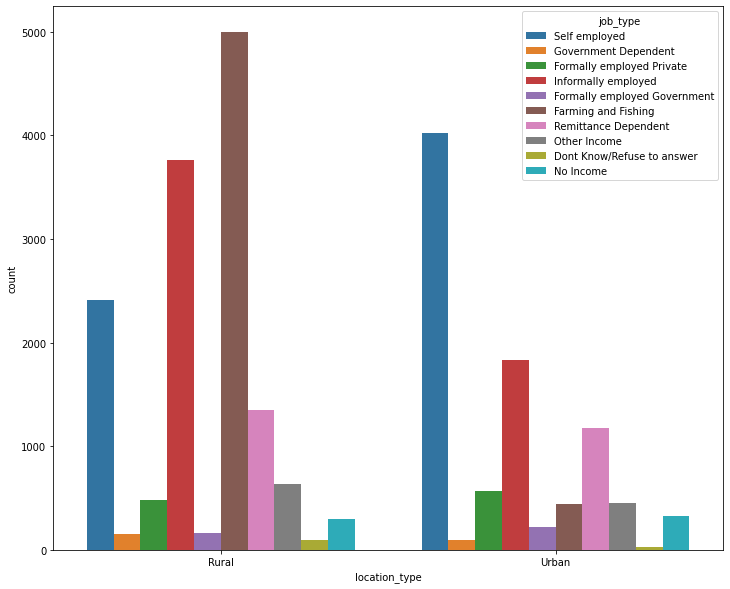

In [ ]:
#The sixth visualization will regard:
#Identification of the employment type and location type, this will determine the areas of interest for analysis. 
#
plt.figure(figsize=(12,10))
sns.countplot(x='location_type', data=df ,hue='job_type' )